# Example linear program - snack optimization

You want to buy some snack for the evening and you have two options:

- *Chips*: a pack costs 38 Kč and it has volume 1.8 liter.
- *Peanuts*: a pack costs 47 Kč, it has volume 0.1 liter but
  you know a pack of chips would make you three times as happy as a pack of peanuts.

You have only 150 Kč in you pocket and 4 liter of space in you backpack.
What you should buy to maximize your happiness.

In [1]:
P = MixedIntegerLinearProgram(solver="glpk")

In [2]:
xx = P.new_variable(nonnegative=True)
chips, peanuts = xx["chips"], xx["peanuts"]

In [3]:
P.add_constraint(38*chips + 47*peanuts <= 150) # money
P.add_constraint(1.8*chips + 0.3*peanuts, max=4) # volume

In [4]:
P.set_objective(3*chips + peanuts)

In [5]:
P.show()

Maximization:
  3.0 x_0 + x_1 

Constraints:
  38.0 x_0 + 47.0 x_1 <= 150.0
  1.8 x_0 + 0.3 x_1 <= 4.0
Variables:
  x_0 is a continuous variable (min=0.0, max=+oo)
  x_1 is a continuous variable (min=0.0, max=+oo)


In [6]:
P.solve()

7.472677595628415

In [7]:
sol = P.get_values(chips), P.get_values(peanuts); sol

(1.953551912568306, 1.6120218579234966)

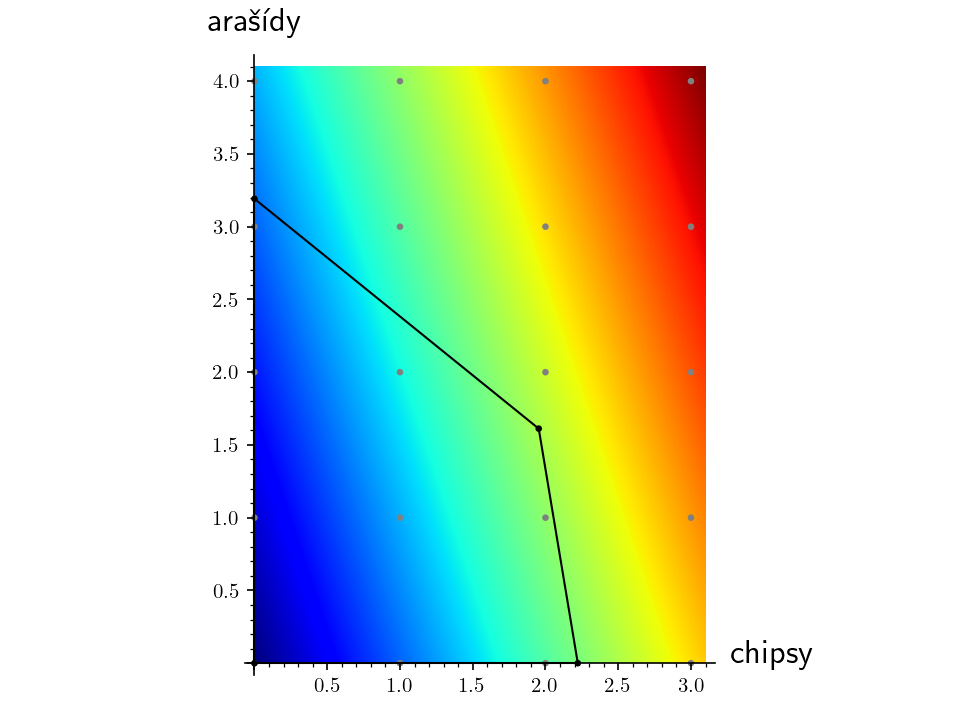

In [8]:
p = density_plot(lambda x, y: 3*x + y, (0, 3.1), (0, 4.1), cmap="jet", plot_points=200)
p += plot(P.polyhedron(), fill=False, color="black")
p += sum( point((x, y), color="gray") for x in range(4) for y in range(5) )
p.show(aspect_ratio=1, dpi=150, axes_labels=["chips", "peanuts"], fig_tight=False)